<a href="https://colab.research.google.com/github/hirajya/CCDEPLRL_EXERCISES_COM222/blob/main/Exercise7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 7

Text Generation using LSTM

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional, LayerNormalization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
tokenizer = Tokenizer()

!wget --no-check-certificate \
    https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt \
    -O /tmp/snowwhite.txt

data = open('/tmp/snowwhite.txt').read()

--2025-05-27 09:13:01--  https://raw.githubusercontent.com/cibernox/storyteller/refs/heads/master/snow-white.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1520 (1.5K) [text/plain]
Saving to: ‘/tmp/snowwhite.txt’

/tmp/snowwhite.txt  100%[===================>]   1.48K  --.-KB/s    in 0s      

2025-05-27 09:13:01 (21.1 MB/s) - ‘/tmp/snowwhite.txt’ saved [1520/1520]



In [46]:
corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_words = len(tokenizer.word_index) + 1

# create input sequences using list of tokens
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)


# pad sequences
max_sequence_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# create predictors and label
predictors, label = input_sequences[:,:-1],input_sequences[:,-1]

label = ku.to_categorical(label, num_classes=total_words)

## Create the LSTM model

1. Build an LSTM

In [59]:
# model = Sequential()
# model.add(Embedding(total_words, 70, input_length=max_sequence_len-1))
# model.add(Bidirectional(LSTM(512, return_sequences=True)))
# model.add(Dropout(0.35))
# model.add(LSTM(256))
# model.add(Dense(128, kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4), ))
# model.add(Dense(total_words, activation='softmax'))
# # Pick an optimizer
# model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())

model = Sequential()
model.add(Embedding(total_words, 100, input_length=max_sequence_len-1)) # Increased embedding dimension
model.add(Bidirectional(LSTM(256, return_sequences=True, recurrent_dropout=0.2))) # Bidirectional LSTM with recurrent dropout
model.add(LayerNormalization()) # Add Layer Normalization
model.add(Dropout(0.3)) # Dropout after the first LSTM
model.add(Bidirectional(LSTM(128))) # Another Bidirectional LSTM
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) # Dense layer with ReLU and regularizers
model.add(Dropout(0.3)) # Another Dropout layer
model.add(Dense(128, activation='relu', kernel_regularizer=regularizers.L1L2(l1=1e-5, l2=1e-4))) # Dense layer with ReLU and regularizers
model.add(Dropout(0.3)) # Another Dropout layer
model.add(Dense(total_words, activation='softmax')) # Output layer

model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy']) # Using Adam with a specific learning rate
print(model.summary())

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_6 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ ?                      │   0 (unbuilt) │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_7 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [60]:
history = model.fit(predictors, label, epochs=70, verbose=1, batch_size=64)

Epoch 1/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.0139 - loss: 5.1931
Epoch 2/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.0357 - loss: 5.0982
Epoch 3/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 0.0512 - loss: 4.9645
Epoch 4/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - accuracy: 0.0523 - loss: 4.9166
Epoch 5/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.0615 - loss: 4.8698
Epoch 6/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 121ms/step - accuracy: 0.0452 - loss: 4.8036
Epoch 7/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 0.0647 - loss: 4.7549
Epoch 8/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step - accuracy: 0.0734 - loss: 4.6410
Epoch 9/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1137 - loss: 4.5861
Epoch 10/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.0994 - loss: 4.4511
Epoch 11/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.1209 - loss: 4.3386
Epoch 12/70
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1087 - loss: 4.355

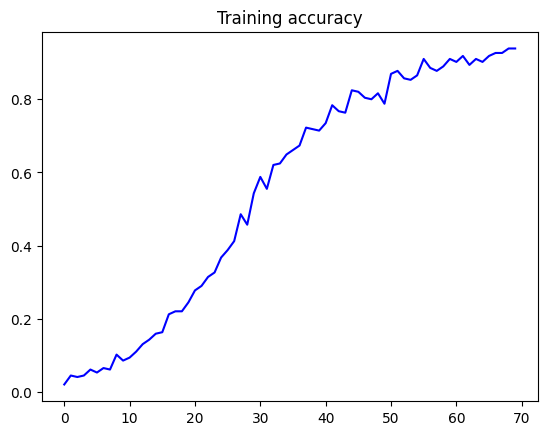

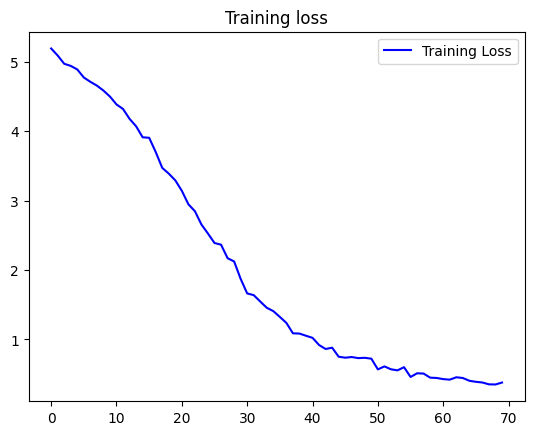

In [61]:
acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

## B. Generate texts


In [62]:
def generate_text(seed_text, next_words=40, temperature=0.5):
    output = seed_text
    for _ in range(next_words):
        token_list = tokenizer.texts_to_sequences([output])[0]
        token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        preds = model.predict(token_list, verbose=0)[0]
        preds = np.log(preds + 1e-8) / temperature
        exp_preds = np.exp(preds)
        preds = exp_preds / np.sum(exp_preds)
        predicted = np.random.choice(len(preds), p=preds)
        output_word = ""
        for word, index in tokenizer.word_index.items():
            if index == predicted:
                output_word = word
                break
        if output_word == "":
            break
        output += " " + output_word
    return output

2. "Snow White lived in the forest with..."

In [63]:
seed_text = "Snow White lived in the forest with"
print(generate_text(seed_text, next_words=100, temperature=10))

Snow White lived in the forest with time long intc a who attracted pretty at stepmother intc him stepmother reward him do it fell get strange furious say off agreed thought prince's when rustlings a woman servant tree this one bribed every an dreadful long this however began daughter castle not began get is sounds came at cry blue wicked ran tiredness until heard long one every it prince's spot return hair wicked grew alone dark stepmother curled snow to jealous to excuse great attracted away thought you asked the death agreed return eyes of sure and tree thump fell came lady thump and majesty forest little


3. "The queen looked into the mirror and said..."

In [64]:
seed_text = "The queen looked into the mirror and said"
print(generate_text(seed_text, next_words=100, temperature=8))

The queen looked into the mirror and said very this do to curled plotting very get happy rid last the failed contented away beautiful man's forest and little by excuse however one eyes her you magic away under pretty him called servants innocent leaving rid she then is the white called tiredness he asleep bitterly on great night everyone tiredness day too attracted called blue get made happy this he eyes he fell and when from it reward of last to attracted attracted away her jealousy return away you take an and was night mirror say not sounds long a become called deed with grew eyes cry though


4. "One day, Snow White found a small cottage and..."

In [65]:
seed_text = "One day, Snow White found a small cottage and"
print(generate_text(seed_text, next_words=100, temperature=8))

One day, Snow White found a small cottage and death and however furious great servants stepmother intc death reward a her long an skin on blue everyone quite alone ran did very a failed calling fatal from beautiful majesty is far is however the spying her not rival say fatal heart began rich spot magic leaving rustlings jealous an mirror this wall say do black with fair man's servant do stepmother one beautiful magic skin led bitterly put and snow mirror white the time fair one land every so so rustlings so upon quite came curled always terrible heard cry by led called called happy forest until every heard


In [71]:
seed_text = "snow white ate a poisonous"
print(generate_text(seed_text, next_words=100, temperature=8))

snow white ate a poisonous an unseen say hair delicate mumbled rival fatal contented long jealousy servant eyes him in pretty led servant prince's curled made but quite it bribed they overcome she however rid mirror sounds spying sounds a attracted delicate bitterly called she in thump an furious woman unseen her who beautiful began and little last away eyes rival death a little death in magic forest castle calling but when her intc dark sounds is loveliest contented curled great woman say overcome lady day by unseen magic white not upon led happy and intc the fair every curled furious a spot castle once


In [72]:
seed_text = "Snow white is"
print(generate_text(seed_text, next_words=100, temperature=8))

Snow white is intc wall she forest who reward spite long get magic made sure mirror return alone hair dark to servant once wicked majesty great him servant rich contented you cry but the excuse trusty strange sitting great take sitting great too plotting always skin return skin sure furious get rich curled rich curled jealousy pretty long away forest tree mumbled blue whenever rich servant strange mirror the reward little an become rival reward quite came jealous then grew land excuse black land asleep in dreadful become came land innocent a quite he heard forest castle away little up last plotting reply
